<h1> Strategic Analysis </h1>
<h4> Strategic Business Information Technology & Problem Solving for Industry (Capstone Project) </h4>
<p> Lecturers: Ken Healy & Muhammad Iqbal </p>
<p> Students: Luiza Cavalcanti Albuquerque Brayner (2020309) & Edgard Pacheco (2020332)  </p>

<b>Solutions, Findings, and Demonstrations. </b>

<h2> Introduction </h2>
<b> In this part of the project, we will be providing a comprehensive solution for a personalized health track and disease risk prediction application. We will demonstrate our data collection, cleanning and visualization  of the fidings, AI models to be used, providing a clear overview of our innovative approach. In this project, we will focus over the prediction of a specific risk of developing cardiovascular diseases, by making use of predictive models, we will make a comparison of some model's performance in making such prediction, and justification of the selection of the final model. </b> 

<h3> Data Gathering Process </h3>
<p> Ref.[1]</p>
<p> User data, will be gathered by a dataset that is previosly done, with some information that would be gathered from the user's input. All user data currently being analysed is fictional, and in the future could be altered to appropriately match the application goals, which offers options for manual input, and therefore provide a personalized response to better user experience. There will also be an upfront form that will be required for user input of personal and health data, that is where the data will come from to do the first prediction. But for testing purposes, we will be training the models over a fictional dataset, mainly created by a snipped of code below. </p> 

In [54]:
# Importing libraries 
import pandas as pd
import numpy as np

# Loading the data from a previous dataset 
df = pd.read_csv('Health_Data_50k_English.csv')

# Data preparation
# Removing columns not used in the model - making the dataset personalized 
df.drop(['Full Name'], axis=1, inplace=True)

# Printing first few rows of the dataset to be analysed 
df.head()

,Age,Gender,Smoking Years,Alcohol Consumption,Physical Activity,Diet,Obesity,Diagnosed Disease,Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),Systolic Blood Pressure (mmHg),Diastolic Blood Pressure (mmHg)
0,31,Female,10,Never,Intense,Unhealthy,Yes,None,178,62,62,210,171,93
1,36,Female,8,Never,Intense,Unhealthy,No,None,227,105,22,245,143,89
2,24,Other,5,Never,None,Balanced,No,None,170,64,43,258,175,115
3,41,Male,1,Never,Moderate,Vegan,Yes,None,206,79,46,117,117,90
4,28,Other,18,Never,Light,Vegetarian,No,None,216,131,78,208,178,71


<h3> Explanation of the code provided above to gather user data </h3>
<p> Ref.[2] </p>
<p> <b> 1. Collecting user data:</b> The main idea is to output a form where the user can input it's own health data and personal data, but for testing purposes as said above, we will be creating such data.</p>
<p> <b> 2. Storing the data:</b> The data is gathered from a previous dataset and then adapted to our own usage, excluding columns that will not be in usage for the analyses. The data is then stored temporarely in a variable. </p>
<p> <b> 3. Writting to CSV:</b> In the original idea, the code will also write the collected user data into a CSV file called "user_data.csv". The file is already created, and it writes on the following available roll. But following the test purpose, this step of the data gathering will be delayed for the implementation part. </p>
<p> <b> 4. Confirmation:</b> Again, focusing over the original idea, after the data is added to the CSV file, then there will be a confirmation message, which will indicate that the data has been submited. But for testing purposes, we double check the dataframe, by printting the first few rows and analysing the output. </p>

Dimensions of the dataset: (50000, 14)
Missing values:
 Age                                0
Gender                             0
Smoking Years                      0
Alcohol Consumption                0
Physical Activity                  0
Diet                               0
Obesity                            0
Diagnosed Disease                  0
Total Cholesterol (mg/dL)          0
LDL Cholesterol (mg/dL)            0
HDL Cholesterol (mg/dL)            0
Triglycerides (mg/dL)              0
Systolic Blood Pressure (mmHg)     0
Diastolic Blood Pressure (mmHg)    0
dtype: int64
Data types:
 Age                                 int64
Gender                             object
Smoking Years                       int64
Alcohol Consumption                object
Physical Activity                  object
Diet                               object
Obesity                            object
Diagnosed Disease                  object
Total Cholesterol (mg/dL)           int64
LDL Cholesterol (mg/dL

/var/folders/bl/19n82dfx2jdcfq3h1tg_4jzh0000gn/T/ipykernel_5174/3305747109.py:34: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


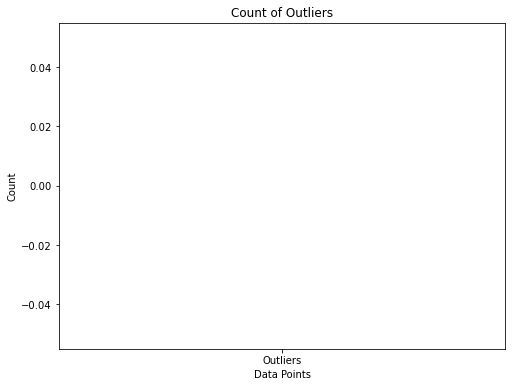

Unique values in Gender: ['Female' 'Other' 'Male']
Unique values in Alcohol Consumption: ['Never' 'Occasionally' 'Regularly']
Unique values in Physical Activity: ['Intense' 'None' 'Moderate' 'Light']
Unique values in Diet: ['Unhealthy' 'Balanced' 'Vegan' 'Vegetarian']
Unique values in Obesity: ['Yes' 'No']
Unique values in Diagnosed Disease: ['None' 'Lung Cancer']


In [55]:
# Import for checking plot of outliers 
import matplotlib.pyplot as plt

# Dimensions
print("Dimensions of the dataset:", df.shape)

# Missing values
print("Missing values:\n", df.isnull().sum())

# Data types of each feature
print("Data types:\n", df.dtypes)

# Numerical features
print("Statistics (summary):\n", df.describe())

# Creating a new DataFrame (converting an existing object df into a DataFrame) 
# It is already a dataframe so basically it is a copy of it
data = pd.DataFrame(df)

# Get duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
# print("Duplicated rows:")
# print(duplicated_rows)

# Count duplicated rows and output
duplicated_counts = df.duplicated().sum()

print("Number of duplicated rows:", duplicated_counts)

# Identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_count = outliers.sum()
print("Number of outliers:", outliers_count)

# Create a bar plot to show outliers visualization 
plt.figure(figsize=(8, 6))
plt.bar(["Outliers"], [outliers_count], color='orange')
plt.xlabel("Data Points")
plt.ylabel("Count")
plt.title("Count of Outliers")
plt.show()

# Check for unique values in categorical columns - data validation 
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

# distribution of categorical features
# print("Distribution of the feature 'Action':\n", df['Action'].value_counts())

<h3> Explanation of the code provided above to perform a data cleanning EDA (Exploratory Data Analysis) </h3> 
<p> Ref.[3] </p>
<p> <b> 1. Identifying dataset dimentions: </b> The dataset to be used is formulated by 50000 instances and 14 features/attributes. Regarding the dimensions of the final dataset (specifically rows and columns), it was possible to ensure that all data was loaded corretly </p> 
<p> <b> 2. Identifying missing values: </b> By making use of '.isnull()' method, it was possible to identify missing values and then count them with the '.sum()' method to check missing values in each column. It is also possible to check that there was no records of missing values, but important to highlight that the values were also filled by 0, null and 'none' variables. Therefore, needing a deeper analysis over that. </p> 
<p> <b> 3. Checking data types:</b> There was a check done for all data types, it was used 'df.dtypes' to recognize all different data types to be used on the analysis and model training. </p> 
<p> <b> 4. Identifying and handling duplicated values:</b> It was done a deeper analysis over the duplicated values, the duplicated values returned an empty dataframe on the first try, which meant that there was no duplicated rows. Secondly it was requested a count of such repeted values, which then returned 0, confirming that there was no repeted values. </p> 
<p> <b> 5. Checking for data normalization and inconsistent values:</b> This step was also done while checking the data types, which included an overview of full dataframe data types for further analysis. See output of code above for further details. </p> 
<p> <b> 6. Identifying outliers:</b> It was creted over the last few lines of code an outliers detection and count, printing 0 on the output, as well as no outliers appered over the visualization, it was also created a graph to visualize such data, but no outliers were shown. </p> 
<b> Data Validation </b>
<p> This step of the data cleaning was done a check for unique values by the end of †he code so far it was done just to give a general idea of the data to be used. This step outputed unique values found in Gender, Alcohool Consumption, Physical Activity, Diet, Obesity, and Diagnosed Disease. Such values were broken down and outputed together with each category.</p> 

In [56]:
# TESTING FIX CODE ABOVE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the features and labels
X = df.drop('Diagnosed Disease', axis=1)
y = df['Diagnosed Disease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


<h3> Explanation of the code provided above to perform the models trainings </h3> 
<p> Ref.[4] </p>
<p> The code below preproces the dataset before training the machine learning model. </p> 
<p> <b> Defining features and labels: </b>Separating the features (X) from the target variable or labels (Y). </p>
<p> <b> Splitting the data: </b>The dataset is then divided into training and testing sets using a function (train_test_split), which randomly splits the dataset into subsets for training and testing the model. The parameter 'test_size' specifies the propotion of the dataset to include in the test split, and 'random_state' ensures reproducubility. </p> 
<b> Definition of numerical and categorical features </b>
<p> <b> Preprocessing pipelines: </b>For numerical features, the pipeline applies standardization using 'StandardScaler' to scale the features to have mean of 0 and a standard deviation of 1. For categorical features, the pipelone applies on-hot encoding using 'OneHotEncoder' to convert categotical variables into binary vectors. </p>
<p> <b> Combination of preprocessing:</b>Combination of such steps were done through the 'ColumnTransformer', which applies specified transformations to the respective feature types. </p>
<p> <b> Preprocessing data:</b>Training and testing sets are preprocessed using the 'ColumnTransformer' preprocessor. The method 'fit_transform' is used on the training set, and the 'transform' method used on the testing set, to ensure consistency in the preprocessing. </p>
<p> Generally, the code above, prepares the dataset by scaling numerical features and encoding categorical features, making the data suitable for training the machine learning model. </p>

ValueError: num must be 1 <= num <= 6, not 7

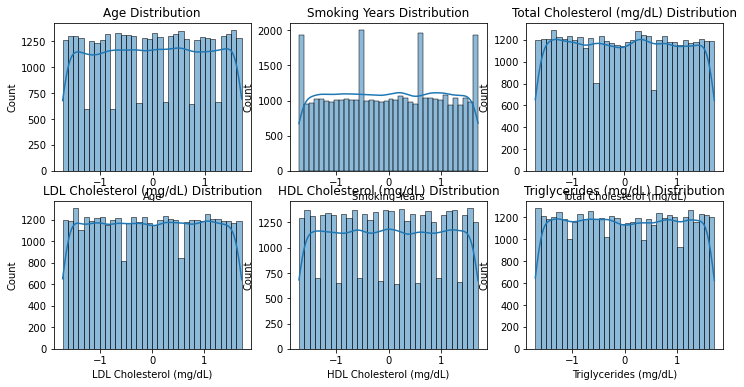

In [57]:
# CHECK THIS PART... CODE VISUALIZATION OF THE ABOVE SNIPPET FINDINGS
import numpy as np

# Get the column names after one-hot encoding
one_hot_feature_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Combine the names of numeric and one-hot encoded features
feature_names = list(numeric_features) + list(one_hot_feature_names)

# Convert preprocessed data to DataFrame for visualization
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Ensure that the indices match
missing_indices = set(X_train_df.columns) - set(feature_names)
for missing_index in missing_indices:
    X_train_df[missing_index] = np.zeros((len(X_train_df), 1))

# Plot histograms for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(X_train_df[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=X_train_df[feature])
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


<h4> Explanation of the visualization above </h4>
<p> </p> 

In [58]:
# Importing libraries to run the learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate the models and print results 
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy}')
    print(f'Confusion Matrix for {name}:\n', confusion_matrix(y_test, predictions))
    print(f'Classification Report for {name}:\n', classification_report(y_test, predictions, zero_division=0))


Logistic Regression Accuracy: 0.9538
Confusion Matrix for Logistic Regression:
 [[   0  462]
 [   0 9538]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

 Lung Cancer       0.00      0.00      0.00       462
        None       0.95      1.00      0.98      9538

    accuracy                           0.95     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.95      0.93     10000

Decision Tree Accuracy: 0.8912
Confusion Matrix for Decision Tree:
 [[  30  432]
 [ 656 8882]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

 Lung Cancer       0.04      0.06      0.05       462
        None       0.95      0.93      0.94      9538

    accuracy                           0.89     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.91      0.89      0.90     10000

Random Forest Accuracy: 0.9538
Confusion Matrix for Ra

<h3>Explanation of models and their respective outcomes </h3>
<p> Ref.[5, 6 & 7] </p>
<p> Generally, the code above imports the required libraries for the model's, then it initilizes the respective models, and lastly trains and evaluate the models outputting the fidings, such as Accuracy, Precision Matrix, and Classification Report. </p>
<p> The chosen models were: Logistic Regression, Decision Tree, and Random Forest, see details below. </p>
<p> <b>Logistic Regression: </b> Due to its suitability for binary classification tasks, for this specific case, it is possible to predict the presence or absence of a disease. This model can also handle both numerial and categorical features. </p> 
<p> <b>Decision Tree: </b>Can handle both numerical and categorical data, without requiring feature scaling or transformation, it is an intuitive to understand and interpret model, beacause the decision-making process mimics human decision-making. The model learns future interactions and can handle both non-linear relationships between features and the target variable. </p> 
<p> <b>Random Forest: </b>Combines multiple decision trees to improve performance, can handle large number of features on datasets, and it is less prone to overfitting, comparing to individual decision. trees (beacause of the averaging effect of multiple trees), this model was also considere because it provides feature importances, which helps identifying features that are most relevant for the prediction. </p> 
<p> Considering the chosen dataset features, and the goal of the program (which is predicting disease diagnosis), the models above offers a good starting point for classificatiion tasks. Certain model might perform better in this case, depending on the specific characteristics of the datase and the desired performance metrics. The evaluation of those 3 models, was chosen ato evaluate and compare the performance using appropriate evaluation metrics, such as accuracy, precision, recall, and F1-score. </p> 

<h3> Exploring the code findings </h3>
<p> </p>
<p> <b> </b> </p>
<p> <b> </b> </p>
<p> <b> </b> </p>

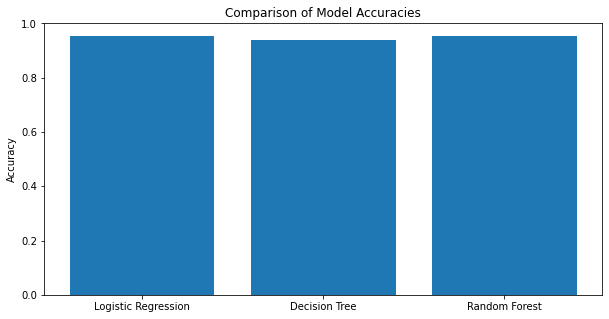

Logistic Regression prediction for the first sample: ['None']
Decision Tree prediction for the first sample: ['None']
Random Forest prediction for the first sample: ['None']


In [53]:
# Importing library to show model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Importing library to plot the result found
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Making a prediction sample
sample = X_test[0].reshape(1, -1) 
for name, model in models.items():
    prediction = model.predict(sample)
    print(f'{name} prediction for the first sample: {prediction}')


<h3> Explanation of the code provided above to perform the models </h3> 
<p> </p> 

<h4> Making use of Dashboards </h4>
<p> For creating the dashboards in this project, we made use of some tools like Plotly. We designed an iteractive dashboard to display user input data, visualize trands in meals, exercise, and lifestyle habits, and present predictive analytics for disease risk assessment. The following dashboards provide users with a comprehensive overview of their health status, and a proactive management for the insights. </p>

<h4> Code explanation and visualization overview </h4>
<p>  </p>

<h4> Machine Learning - Classification Model </h4>
<p> The chosen model is <b> Random Forest Classifier</b>, due to its accuracy, and ability to handle both numerical and categorical features in an efficient way. The model was decided taking into consideration that our project involves predicting the risk of developing certain diseases based on lifestyle habits and nutritional information. Therefore the project will be based on the predictive modelling. </p>

<h4> Addition of a dataset, it will be used for the disease prediction along with user gathered data </h4>
<p> The chosen extra dataset is    which will be merged to our current 'user_data.csv', for then predicting what will be required. </p>

<h4> Explanation of the code above - classification model performance </h4>

<h2>References </h2>
<p> 1. Data Collection and Data Preprocessing in Machine Learning with Python. Turing.com. Available from: <a> https://www.turing.com/kb/how-data-collection-and-data-preprocessing-in-python-help-in-machine-learning </a> [accessed 28 April 2024]. </p>
<p> 2. R., J. (2023). 1. Data Collection using python. Medium.com. Available from: <a> https://medium.com/@renrihui8415/1-data-collection-using-python-a31a7417d422 </a> [accessed 28 April 2024].</p>
<p> 3.  Madendere Barın, G. (2024). Effective Data Cleaning Strategies in Python for Exploratory Data Analysis (EDA). Medium.com. Available from: <a> https://medium.com/@gozdemadendere/effective-data-cleaning-strategies-in-python-for-exploratory-data-analysis-eda-c9025d5f35e4 </a> [accessed 28 April 2024]. </p>
<p> 4. Chaitanya, N. (2023). Critical steps to training and evaluating AI and ML models. columbus.com. Available from: <a> https://www.columbusglobal.com/en/blog/critical-steps-to-training-and-evaluating-ai-and-ml-models </a> [accessed 30 April 2024]. </p>
<p> 5. What is Logistic Regression? IBM.  Available from: <a> https://www.ibm.com/topics/logistic-regression </a> [accessed 30 April 2024]. </p>
<p> 6. Decision Trees for Decision Making. Harvard Bussiness Review. Available from: <a> https://hbr.org/1964/07/decision-trees-for-decision-making </a> [accessed 30 April 2024]. </p>
<p> 7. Random Forest. h2o.ai. Available from: <a> https://h2o.ai/wiki/random-forest/ </a> [accessed 30 April 2024]. </p>
<p> 8. </p>
<p> 9. </p>
<p> 10. </p>
<p> 11. </p>
<p> 12. </p>
<p> 13. </p>
<p> 14. </p>
<p> 15. </p>
<p> 16. </p>
<p> 17. </p>
<p> 18. </p>
<p> 19. </p>
<p> 20. </p>
<p> 21. </p>